In [3]:
# Voila Web App

## A website built out of a Jupyter notebook using Voila

# Task Description: The Best Classifier

In this project, you will complete a notebook where **you will build a classifier to predict whether a loan case will be paid off or not.**
You load a historical dataset from previous **loan applications**, clean the data, and apply different classification algorithm on the data. You are expected to use the following algorithms to build your models:<br>
- `k-Nearest Neighbour`
- `Decision Tree`
- `Support Vector Machine`
- `Logistic Regression`
<br>
The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:
- `Jaccard index`
- `F1-score`
- `LogLoss`
<br>

Review criteria:<br> 
This final project will be graded by your peers who are completing this course during the same session. This project is worth 25 marks of your total grade, broken down as follows:
***
1.	Building model using KNN, finding the best k and accuracy evaluation (7 marks)
2.	Building model using Decision Tree and find the accuracy evaluation (6 marks)
3.	Building model using SVM and find the accuracy evaluation (6 marks)
4.	Building model using Logistic Regression and find the accuracy evaluation (6 marks)
***


# Table of Contents:
1. [Importing python modules for data analysis and machine learning](#sec1)
2. [Get the dataset from IBM Cloud](#sec2) 
3. [About the dataset](#sec3) 
    * [3.1 Quick view of the dataset](#sec3.1)
    * [3.2 Check the datatypes for columns in data](#sec3.2)
    * [3.3 Plot distribution for categorical data to inspect missing value counts](#sec3.3)
    * [3.4 Check if numerical data contains missing values](#sec3.4)
4. [Feature Engineering](#sec4)
5. [Model Development](#sec5)
    * [5.1 Scaling of features](#sec4.1)
    * [5.2 KNN Model](#sec5.2)
    * [5.3 Decision Tree Model](#sec5.3)
    * [5.4 Support Vector Machine Model](#sec5.4)
    * [5.5 Logistic Regression Model](#sec5.5)
6. [Model Validation on the test set](#sec6)
    * [6.1 Data Preprocessing](#sec6.1)
    * [6.2 Report](#sec6.2)

<a id="sec1"></a>
# [1. Importing python modules for data analysis and machine learning](#sec1)

In [3]:
import pandas as pd # for data analysis
import numpy as np # for mathematical calculations on Matrix
import matplotlib.pyplot as plt # for plotting
import scipy.optimize as opt # if needed
from sklearn import preprocessing # for data cleaning and preprocessing
from sklearn.model_selection import train_test_split # for out-of-sample validation and splitting the data

# Interactive pthon imports
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual
import ipywidgets as widgets

from IPython.display import display

%matplotlib inline


# custom import for analyzing categorical and numerical data
#import helpers

<a id="sec2"></a>
# [2. Get the dataset from IBM Cloud](#sec2)

In [4]:
#!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-02-07 17:03:52--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2021-02-07 17:03:53 (1.04 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [5]:
# download the test set
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-02-07 17:03:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-02-07 17:03:54 (1.70 GB/s) - ‘loan_test.csv’ saved [3642/3642]



<a id="sec3"></a>
# [3. About the dataset](#sec3)

This dataset is about past loans. The Loan_train.csv data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:
***
Field	Description
- `Loan_status`:	Whether a loan is paid off on in collection
- `Principal`:	Basic principal loan amount at the
- `Terms`:	Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule
- `Effective_date`:	When the loan got originated and took effects
- `Due_date`:	Since it’s one-time payoff schedule, each loan has one single due date
- `Age`:	Age of applicant
- `Education`:	Education of applicant
- `Gender`:	The gender of applicant
***

<a id="sec3.1"></a>
## [3.1 Quick view of the dataset](#sec3.1)

In [6]:
loan_data = pd.read_csv('loan_train.csv')

In [7]:
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### we can see that the index is default (int), first 2 columns don't look informatory so we remove them.

In [8]:
loan_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [9]:
loan_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis= 1, inplace=True)
loan_data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [10]:
loan_test = pd.read_csv('loan_test.csv')
loan_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [11]:
loan_test.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis= 1, inplace=True) # applying same operation to test data

<a id="sec3.2"></a>
## [3.2 Check the datatypes for each column in data](#sec3.2)

In [12]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null object
due_date          346 non-null object
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB


In [13]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
loan_status       54 non-null object
Principal         54 non-null int64
terms             54 non-null int64
effective_date    54 non-null object
due_date          54 non-null object
age               54 non-null int64
education         54 non-null object
Gender            54 non-null object
dtypes: int64(3), object(5)
memory usage: 3.5+ KB


In [14]:
### quickly describe data
loan_data.describe(include='all')

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346,346.000000,346.000000,346,346,346.000000,346,346
unique,2,NaN,NaN,7,23,NaN,4,2
top,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,NaN,High School or Below,male
freq,260,NaN,NaN,166,90,NaN,151,294
mean,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN
50%,NaN,1000.000000,30.000000,NaN,NaN,30.000000,NaN,NaN
75%,NaN,1000.000000,30.000000,NaN,NaN,35.000000,NaN,NaN


In [15]:
loan_test.describe(include='all')

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,54,54.000000,54.000000,54,54,54.000000,54,54
unique,2,NaN,NaN,7,17,NaN,4,2
top,PAIDOFF,NaN,NaN,9/11/2016,9/25/2016,NaN,college,male
freq,40,NaN,NaN,24,11,NaN,23,43
mean,NaN,914.814815,21.888889,NaN,NaN,31.833333,NaN,NaN
std,NaN,174.190751,8.818220,NaN,NaN,5.992920,NaN,NaN
min,NaN,300.000000,7.000000,NaN,NaN,20.000000,NaN,NaN
25%,NaN,800.000000,15.000000,NaN,NaN,28.000000,NaN,NaN
50%,NaN,1000.000000,30.000000,NaN,NaN,30.500000,NaN,NaN
75%,NaN,1000.000000,30.000000,NaN,NaN,36.000000,NaN,NaN


<a id="sec3.3"></a>
## [3.3 Plot distribution for categorical data to inspect missing value counts](#sec3.3)



In [16]:
loan_data_cpy = loan_data.copy() # just work with copy to avoid any unneccessary changes to the original data
cat_data = loan_data_cpy.select_dtypes(include=['object'])
cat_data.head()

,loan_status,effective_date,due_date,education,Gender
0,PAIDOFF,9/8/2016,10/7/2016,High School or Below,male
1,PAIDOFF,9/8/2016,10/7/2016,Bechalor,female
2,PAIDOFF,9/8/2016,9/22/2016,college,male
3,PAIDOFF,9/9/2016,10/8/2016,college,female
4,PAIDOFF,9/9/2016,10/8/2016,college,male


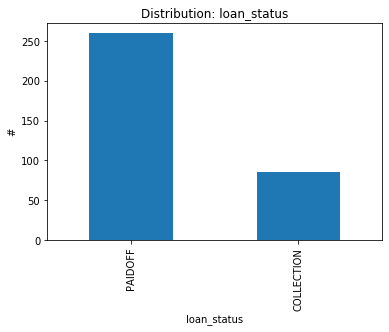

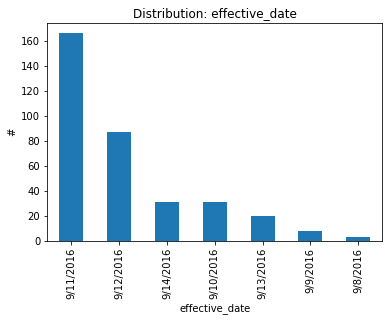

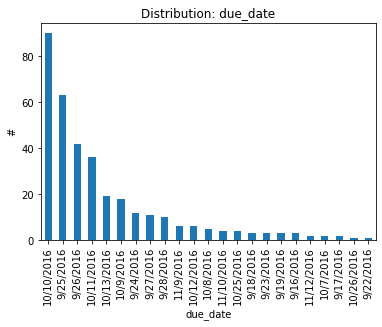

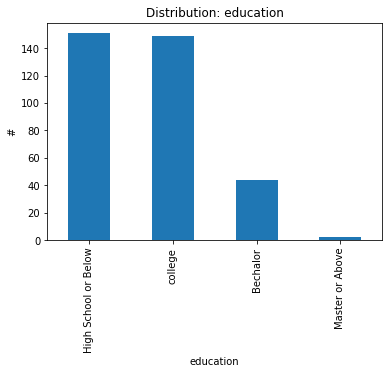

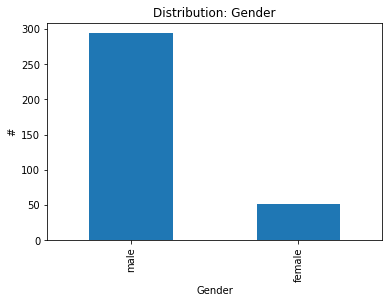

In [17]:
# For every column in cat_data, plotting histogram of value_counts
# And we can see from below, there is no irregularity or missing values
for col in cat_data.columns:
    cat_data[col].value_counts().plot(kind='bar')
    plt.title('Distribution: {}'.format(col))
    plt.ylabel('#')
    plt.xlabel(col)    
    plt.show()
    

<a id="sec3.4"></a>
## [3.4 Check if numerical data contains missing values](#sec3.4)


In [18]:
num_data = loan_data_cpy.select_dtypes(include=['int64']) # since we only have int64 as the remaining data
num_data.head()

,Principal,terms,age
0,1000,30,45
1,1000,30,33
2,1000,15,27
3,1000,30,28
4,1000,30,29


In [19]:
pd.isnull(num_data).any() #so no irregularity here as well

Principal    False
terms        False
age          False
dtype: bool

<a id="sec4"></a>
# [4. Feature Engineering](#sec4)


## Preprocessing
### As for modeling purpose we need the X (data matrix for scikit models) to be numeric, so we will convert the categorical columns to numeric using LabelEncoders(), leaving out the date variables. We will process date variables in the the next stage.

In [20]:


# lets get the categorical data excluding date columns
X_cat_exc_date=cat_data[['loan_status', 'education', 'Gender']].values
X_cat_exc_date[0:5]

array([['PAIDOFF', 'High School or Below', 'male'],
       ['PAIDOFF', 'Bechalor', 'female'],
       ['PAIDOFF', 'college', 'male'],
       ['PAIDOFF', 'college', 'female'],
       ['PAIDOFF', 'college', 'male']], dtype=object)

In [21]:
le_loan_st = preprocessing.LabelEncoder()
le_loan_st.fit(['PAIDOFF', 'COLLECTION'])
X_cat_exc_date[:,0] = le_loan_st.transform(X_cat_exc_date[:,0])

le_educ = preprocessing.LabelEncoder()
le_educ.fit(['Bechalor', 'High School or Below', 'Master or Above', 'college'])
X_cat_exc_date[:,1] = le_educ.transform(X_cat_exc_date[:,1])

le_gen = preprocessing.LabelEncoder()
le_gen.fit(['female', 'male'])
X_cat_exc_date[:,2] = le_gen.transform(X_cat_exc_date[:,2])



In [22]:
X_cat_exc_date[0:5]

array([[1, 1, 1],
       [1, 0, 0],
       [1, 3, 1],
       [1, 3, 0],
       [1, 3, 1]], dtype=object)

### Now Coming back to the date variables. Ideally, We would want them to be some sort of features. To do this, we could first convert the object dates into pandas datetime and then introduce differences - between the date and now

In [23]:
X_cat_date=cat_data[['effective_date','due_date']].copy()
X_cat_date.head()

,effective_date,due_date
0,9/8/2016,10/7/2016
1,9/8/2016,10/7/2016
2,9/8/2016,9/22/2016
3,9/9/2016,10/8/2016
4,9/9/2016,10/8/2016


In [24]:
X_cat_date = X_cat_date.applymap(lambda x : pd.to_datetime(x, format = '%M/%d/%Y'))

In [25]:
X_cat_date

,effective_date,due_date
0,2016-01-08 00:09:00,2016-01-07 00:10:00
1,2016-01-08 00:09:00,2016-01-07 00:10:00
2,2016-01-08 00:09:00,2016-01-22 00:09:00
3,2016-01-09 00:09:00,2016-01-08 00:10:00
4,2016-01-09 00:09:00,2016-01-08 00:10:00
...,...,...
341,2016-01-11 00:09:00,2016-01-25 00:09:00
342,2016-01-11 00:09:00,2016-01-10 00:10:00
343,2016-01-12 00:09:00,2016-01-26 00:09:00
344,2016-01-12 00:09:00,2016-01-10 00:11:00


In [26]:
from datetime import datetime

now = datetime.now()

X_cat_date['effective_date'] = X_cat_date['effective_date'].apply(lambda x :round((now - x).days/7))# calculate the Weeks
X_cat_date['due_date'] = X_cat_date['due_date'].apply(lambda x :round((now - x).days/7))# calculate the Weeks


In [27]:
X_cat_date

,effective_date,due_date
0,265,265
1,265,265
2,265,263
3,265,265
4,265,265
...,...,...
341,265,263
342,265,265
343,265,263
344,265,265


In [28]:
X = np.column_stack((X_cat_exc_date[:,1:], X_cat_date.values, num_data.values)).astype('int64')
y =  X_cat_exc_date[:,0].astype('int64')




### standarize the matrix values

In [29]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-0.64691859,  0.42056004,  0.31370798, ...,  0.51578458,
         0.92071769,  2.33152555],
       [-1.5212695 , -2.37778177,  0.31370798, ...,  0.51578458,
         0.92071769,  0.34170148],
       [ 1.10178323,  0.42056004,  0.31370798, ...,  0.51578458,
        -0.95911111, -0.65321055],
       ...,
       [ 1.10178323,  0.42056004,  0.31370798, ..., -1.31458942,
        -0.95911111,  1.33661351],
       [ 1.10178323,  0.42056004,  0.31370798, ...,  0.51578458,
         0.92071769, -0.48739188],
       [ 1.10178323,  0.42056004,  0.31370798, ...,  0.51578458,
         0.92071769, -0.81902922]])

### Preprocessing stage Completed. These are the Final matrices for machine learning modeling
#### For X columns are in the order: 'Education', 'Gender', 	'Effective date', 'Due date', 'Principal, 'terms, 'Age' 

In [30]:
X,y

(array([[-0.64691859,  0.42056004,  0.31370798, ...,  0.51578458,
          0.92071769,  2.33152555],
        [-1.5212695 , -2.37778177,  0.31370798, ...,  0.51578458,
          0.92071769,  0.34170148],
        [ 1.10178323,  0.42056004,  0.31370798, ...,  0.51578458,
         -0.95911111, -0.65321055],
        ...,
        [ 1.10178323,  0.42056004,  0.31370798, ..., -1.31458942,
         -0.95911111,  1.33661351],
        [ 1.10178323,  0.42056004,  0.31370798, ...,  0.51578458,
          0.92071769, -0.48739188],
        [ 1.10178323,  0.42056004,  0.31370798, ...,  0.51578458,
          0.92071769, -0.81902922]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
   

In [31]:
X.shape

(346, 7)

<a id="sec5"></a>
# [5. Model Development](#sec5)


<a id="sec5.1"></a>
## [5.1 Scaling of Features](#sec5.1)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4) # assuming 80 train, 20 test % 
print('Train set: ', X_train.shape, y_train.shape)
print('Train set: ', X_test.shape, y_test.shape)


Train set:  (276, 7) (276,)
Train set:  (70, 7) (70,)


In [33]:
# Choice:1 Model Type 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline # for pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier


# Choice:2 Test Size
test_10 = 0.1
test_20 = 0.2
test_30 = 0.3
test_40 = 0.4
test_50 = 0.5

# Choice:3 Metric
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics
from mpl_toolkits.mplot3d import Axes3D 

In [71]:
def roc_cv(X, y, classifier):
    import numpy as np
    import matplotlib.pyplot as plt

    from sklearn import svm, datasets
    from sklearn.metrics import auc
    from sklearn.metrics import plot_roc_curve
    from sklearn.model_selection import StratifiedKFold

    # #############################################################################
    # Data IO and generation

    # Import some data to play with
    #iris = datasets.load_iris()
    #X = iris.data
    #y = iris.target
    #X, y = X[y != 2], y[y != 2]
    n_samples, n_features = X.shape

    # Add noisy features
    #random_state = np.random.RandomState(0)
    #X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

    # #############################################################################
    # Classification and ROC analysis

    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=6)
    #classifier = svm.SVC(kernel='linear', probability=True,
    #                    random_state=random_state)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(14,6))
    fig.suptitle('ROC Curves with CV')
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = plot_roc_curve(classifier, X[test], y[test],
                            name='ROC fold {}'.format(i),
                            alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()

In [72]:
def func_fit(model_type,test_size):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=55)
    print('Train test Split done\n')
    print('Rows X:', X_train.shape[0])
    
    def cross_validate_knn_k(X, y):
        Ks = 58
        mean_acc = np.zeros((Ks-1))
        std_acc = np.zeros((Ks-1))

        for n in range(1, Ks):

            # Train and predict
            neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
            y_hat=neigh.predict(X_test)
            mean_acc[n-1]=metrics.accuracy_score(y_test, y_hat)
            std_acc = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

        #print("The Best acc. was ", mean_acc.max(), "with K=", mean_acc.argmax()+1)
        return mean_acc.argmax()+1
    
    def cross_validate_dt_max_depth_criterion(X, y):
        Ks = 20
        criterias = ['entropy', 'gini']
        mean_acc = np.zeros((Ks-1, len(criterias)))
        std_acc = np.zeros((Ks-1, len(criterias)))

        for n in range(1, Ks):
            
            for cr in range(1, len(criterias)):

                # Train and predict
                dt=DecisionTreeClassifier(criterion = criterias[cr], max_depth=n).fit(X_train,y_train)
                y_hat=dt.predict(X_test)
                mean_acc[n-1, cr-1] = metrics.accuracy_score(y_test, y_hat)
                std_acc[n-1, cr-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
        
        #mat_max = np.amax(mean_acc)
        #d_ind, cr_ind = np.where(mean_acc == np.amax(mean_acc))
        
        #print(mean_acc)
        d_ind, cr_ind = np.unravel_index(np.argmax(mean_acc, axis=None), mean_acc.shape)  # returns a tuple
        #print("The Best acc. was ", mean_acc.max(), "with d=", d_ind, "with cr=", cr_ind)
        return d_ind+1, criterias[cr_ind]
    
    def cross_validate_svm_ker(X, y):
        kernels = ['linear', 'poly', 'rbf']
        mean_acc = np.zeros(len(kernels))
        std_acc = np.zeros(len(kernels))

        for n in range(1, len(kernels)):

            # Train and predict
            sv=svm.SVC(kernel=kernels[n]).fit(X_train,y_train)
            y_hat=sv.predict(X_test)
            mean_acc[n-1]=metrics.accuracy_score(y_test, y_hat)
            std_acc = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

        #print("The Best acc. was ", mean_acc.max(), "with kernel=", kernels[mean_acc.argmax()])
        return kernels[mean_acc.argmax()]
    
    
    if (model_type=='KNeigbors Classifier'):
        k = cross_validate_knn_k(X, y)
        model = make_pipeline(KNeighborsClassifier(n_neighbors=k))
    if (model_type== 'Decision Trees Classifier'):
        dep, cr = cross_validate_dt_max_depth_criterion(X,y)
        dt= DecisionTreeClassifier(criterion=cr, max_depth=dep)
        model = make_pipeline(dt)
    if (model_type== 'SVM Classifier'): 
        ker = cross_validate_svm_ker(X, y)
        svm_cl = svm.SVC(kernel=ker)
        model = make_pipeline(svm_cl)
    if (model_type == 'LogRegress Classifier'):
        model = make_pipeline(LogisticRegression(C=0.01, solver='liblinear', random_state=42))
    if (model_type == 'SGD Classifier'):
        model = make_pipeline(SGDClassifier(random_state=42))
    if (model_type ==  'ExTrees Classifier'):
        model = make_pipeline(ExtraTreesClassifier(random_state=42))
    if (model_type == 'GBM Classifier'):
        model = make_pipeline(GradientBoostingClassifier(random_state=42))
    if (model_type == 'Random Forest Classifier'):
        model = make_pipeline(RandomForestClassifier(random_state=42))
    if (model_type == 'XGBoost Classifier'):
        model = make_pipeline(XGBClassifier(seed=42))

    X_train=X_train#.reshape(-1,1)
    X_test=X_test#.reshape(-1,1)
    
    model.fit(X_train,y_train)
    
    train_pred = np.array(model.predict(X_train))
    train_score = metrics.accuracy_score(y_train, train_pred)#model.score(X_train,y_train)
    
    test_pred = np.array(model.predict(X_test))
    test_score = train_score = metrics.accuracy_score(y_test, test_pred)
    
    #RMSE_test=np.sqrt(np.mean(np.square(test_pred-y_test)))
    #RMSE_train=np.sqrt(np.mean(np.square(train_pred-y_train)))
    
    # PCA for plotting Wide matrix X to keep only 2 columns
    from sklearn.decomposition import PCA
    
    X_test_pca = PCA(n_components=2).fit_transform(X_test)
    X_train_pca = PCA(n_components=2).fit_transform(X_train)
    
    
    fig = plt.figure(figsize=(14,6))
    
    ax = fig.add_subplot(122, projection='3d')

    xx = X_test_pca[:,0]
    yy = X_test_pca[:,1]
    z = y_test
    zz = test_pred
    
    #print('\nxx shape:', xx.shape)
    #print('\nyy shape:', yy.shape)
    #print('\nz shape:', z.shape)
    


    ax.scatter(xx, yy, z, c='r', marker='o')
    ax.scatter(xx, yy, zz, c='b', marker='*')
    ax.set_xlabel('Feature-1')
    ax.set_ylabel('Feature-2')
    ax.set_zlabel('Y-test/Pred')
    plt.grid(True)
    plt.legend(['Actual test values','Predicted values'])

    
    ax = fig.add_subplot(121, projection='3d')

    xx = X_train_pca[:, 0]
    yy = X_train_pca[:, 1]
    z = y_train
    zz = train_pred



    ax.scatter(xx, yy, z, c='r', marker='o')
    ax.scatter(xx, yy, zz, c='b', marker='*')
    ax.set_xlabel('Feature-1')
    ax.set_ylabel('Feature-2')
    ax.set_zlabel('Y-train/Pred')
    plt.grid(True)
    plt.legend(['Actual train values','Predicted values'])
    fig.suptitle('Train Test Prediction PCA view')
    plt.show();

    fig2 = plt.figure(figsize=(14,6))
    fig2.suptitle('Confusion Matrix Train/Test')
    ax1 = fig2.add_subplot(121)
    ax2 = fig2.add_subplot(122)

    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(model, X_train, y_train, ax= ax1, display_labels = ['default', 'paid off'], values_format='d')
    plot_confusion_matrix(model, X_test, y_test, ax= ax2, display_labels = ['default', 'paid off'], values_format='d')
    #plt.title('Confusion matrix (Train/Test)')
    plt.show();

    #ig3=plt.figure(figsize=(14,6))
    #fig3.suptitle('ROC Curves')
    #ax31=fig3.add_subplot(121)
    #ax32=fig3.add_subplot(122)
    roc_cv(X,y, model)


    print('\nTraining accuracy: ', train_score)
    print('\nTest accuracy: ', test_score)

    return (train_score,test_score)

In [92]:
# Run the encapsulated Ml func with widgets

In [73]:
style = {'description_width': 'initial'}
# Continuous_update = False for IntSlider control to stop continuous model evaluation while the slider is being dragged
m = interactive(func_fit,model_type=widgets.RadioButtons(options=['KNeigbors Classifier',\
                                                                                                                'Decision Trees Classifier',\
                                                                                                                 'SVM Classifier',\
                                                                                                                 'LogRegress Classifier',\
                                                                                                                 'SGD Classifier',\
                                                                                                                 'ExTrees Classifier',\
                                                                                                                 'GBM Classifier',\
                                                                                                                 'Random Forest Classifier',\
                                                                                                                 'XGBoost Classifier'],
                                                    description = "Choose Model",style=style,
                                                        layout=Layout(width='250px')),
                test_size=widgets.Dropdown(options={"10% of data":test_10,"20% of data":test_20, "30% of data":test_30,
                                                    "40% of data":test_40,"50% of data":test_50},
                                          description="Test set size (percentage)",style=style),
               #degree=widgets.IntSlider(min=1,max=10,step=1,description= 'Polynomial($\sum\limits_{i=1}^n a_nx^n$)',
               #                        style=style,continuous_update=False)
               
               )

# Set the height of the control.children[-1] so that the output does not jump and flicker
output = m.children[-1]
output.layout.height = '450px'

# Display the control
display(m)

interactive(children=(RadioButtons(description='Choose Model', layout=Layout(width='250px'), options=('KNeigbo…

In [206]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

<a id="sec6"></a>
# [6. Model Evaluation on Test data](#sec6)


<a id="sec6.1"></a>
## [6.1 Data preprocessing](#sec6.1)


In [210]:
pd.isnull(loan_test).sum() # no missing values in test data

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [211]:

#le_loan_st = preprocessing.LabelEncoder()
#le_loan_st.transform(loan_test.loc[:,'loan_status'])
loan_test.loc[:,'loan_status'] = le_loan_st.transform(loan_test.loc[:,'loan_status'])
#le_loan_st.fit(['PAIDOFF', 'COLLECTION'])
#X_cat_exc_date[:,0] = le_loan_st.transform(X_cat_exc_date[:,0])

#le_educ = preprocessing.LabelEncoder()
#le_educ.fit(['Bechalor', 'High School or Below', 'Master or Above', 'college'])
loan_test.loc[:,'education'] = le_educ.transform(loan_test.loc[:,'education'])
#X_cat_exc_date[:,1] = le_educ.transform(X_cat_exc_date[:,1])

#le_gen = preprocessing.LabelEncoder()
#le_gen.fit(['female', 'male'])
loan_test.loc[:,'Gender'] = le_gen.transform(loan_test.loc[:,'Gender'])
#X_cat_exc_date[:,2] = le_gen.transform(X_cat_exc_date[:,2])
loan_test



,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,9/8/2016,10/7/2016,50,0,0
1,1,300,7,9/9/2016,9/15/2016,35,2,1
2,1,1000,30,9/10/2016,10/9/2016,43,1,0
3,1,1000,30,9/10/2016,10/9/2016,26,3,1
4,1,800,15,9/11/2016,9/25/2016,29,0,1
5,1,700,15,9/11/2016,9/25/2016,33,1,1
6,1,1000,15,9/11/2016,9/25/2016,24,3,1
7,1,1000,30,9/11/2016,10/10/2016,32,0,1
8,1,800,15,9/11/2016,9/25/2016,27,3,0
9,1,1000,15,9/11/2016,9/25/2016,37,3,1


In [212]:
loan_test

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,9/8/2016,10/7/2016,50,0,0
1,1,300,7,9/9/2016,9/15/2016,35,2,1
2,1,1000,30,9/10/2016,10/9/2016,43,1,0
3,1,1000,30,9/10/2016,10/9/2016,26,3,1
4,1,800,15,9/11/2016,9/25/2016,29,0,1
5,1,700,15,9/11/2016,9/25/2016,33,1,1
6,1,1000,15,9/11/2016,9/25/2016,24,3,1
7,1,1000,30,9/11/2016,10/10/2016,32,0,1
8,1,800,15,9/11/2016,9/25/2016,27,3,0
9,1,1000,15,9/11/2016,9/25/2016,37,3,1


In [213]:
loan_test[['effective_date','due_date']] = loan_test[['effective_date','due_date']].applymap(lambda x : pd.to_datetime(x, format = '%M/%d/%Y'))

In [214]:
#now = datetime.now()

loan_test['effective_date'] = loan_test['effective_date'].apply(lambda x :round((now - x).days/7))# calculate the Weeks
loan_test['due_date'] = loan_test['due_date'].apply(lambda x :round((now - x).days/7))# calculate the Weeks



In [215]:
X

array([[-0.64691859,  0.42056004,  0.31370798, ...,  0.51578458,
         0.92071769,  2.33152555],
       [-1.5212695 , -2.37778177,  0.31370798, ...,  0.51578458,
         0.92071769,  0.34170148],
       [ 1.10178323,  0.42056004,  0.31370798, ...,  0.51578458,
        -0.95911111, -0.65321055],
       ...,
       [ 1.10178323,  0.42056004,  0.31370798, ..., -1.31458942,
        -0.95911111,  1.33661351],
       [ 1.10178323,  0.42056004,  0.31370798, ...,  0.51578458,
         0.92071769, -0.48739188],
       [ 1.10178323,  0.42056004,  0.31370798, ...,  0.51578458,
         0.92071769, -0.81902922]])

In [216]:
loan_test = loan_test.astype('int')
X_val = loan_test[['education', 'Gender', 'effective_date', 'due_date', 'Principal', 'terms', 'age']].values
y_val = loan_test[['loan_status']].values

X_val = preprocessing.StandardScaler().fit(X_val).transform(X_val)

In [217]:
X_val

array([[-1.50366322, -1.97714211,  0.19611614,  0.88141139,  0.49362588,
         0.92844966,  3.05981865],
       [ 0.22394984,  0.50578054,  0.19611614, -0.20032077, -3.56269116,
        -1.70427745,  0.53336288],
       [-0.63985669, -1.97714211,  0.19611614,  0.88141139,  0.49362588,
         0.92844966,  1.88080596],
       [ 1.08775637,  0.50578054,  0.19611614,  0.88141139,  0.49362588,
         0.92844966, -0.98251057],
       [-1.50366322,  0.50578054,  0.19611614, -1.28205293, -0.66532184,
        -0.78854628, -0.47721942],
       [-0.63985669,  0.50578054,  0.19611614, -1.28205293, -1.24479571,
        -0.78854628,  0.19650211],
       [ 1.08775637,  0.50578054,  0.19611614, -1.28205293,  0.49362588,
        -0.78854628, -1.31937134],
       [-1.50366322,  0.50578054,  0.19611614,  0.88141139,  0.49362588,
         0.92844966,  0.02807173],
       [ 1.08775637, -1.97714211,  0.19611614, -1.28205293, -0.66532184,
        -0.78854628, -0.81408019],
       [ 1.08775637,  0.5057

## Report

In [218]:
# importing all the models
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

def create_baseline_classifiers(seed=8):
    """Create a list of baseline classifiers.
    
    Parameters
    ----------
    seed: (optional) An integer to set seed for reproducibility
    Returns
    -------
    A list containing tuple of name, model object for each of these algortihms:
    DummyClassifier, LogisticRegression, SGDClassifier, ExtraTreesClassifier, 
    GradientBoostingClassifier, RandomForestClassifier, MultinomialNB, SVC, 
    XGBClassifier.
    
    """
    models = []
    models.append(('Logistic Regression', LogisticRegression(C=0.01, solver='liblinear', random_state=seed)))
    models.append(('Stochastic Gradient Descent Classifier', SGDClassifier(random_state=seed)))
    models.append(('Extra Tress Classifier', ExtraTreesClassifier(random_state=seed)))
    models.append(('Gradient Boosting Machines Classifier', GradientBoostingClassifier(random_state=seed)))
    models.append(('Random Forest Classifier', RandomForestClassifier(random_state=seed)))
    #models.append(('Multinomial Naive Bayes Classifier', MultinomialNB()))
    models.append(('Support Vector Machine Classifier', svm.SVC(kernel='rbf')))
    models.append(('XGBoost Classifier', XGBClassifier(seed=seed)))
    models.append(('KNeighbors Classifier', KNeighborsClassifier(n_neighbors=15)))
    models.append(('Decision Trees Classifier', DecisionTreeClassifier(criterion='entropy', max_depth=4)))
    return models


def fit_models(X, y, models):
    """
    fit models on data.
    
    Parameters
    ----------
    X: A pandas DataFrame containing feature matrix
    y: A pandas Series containing target vector
    models: A list of models to train

    Returns:
    fit dictionary for all the models
    -------
    
    """
    fit={}
    for name, model in models:
        fit[name] = model.fit(X,y) #pd.DataFrame(cross_validate(model, X, y, cv=cv, scoring=metrics))
        
    return fit
    
def predict_models(X_test, fit):
    """
    predict target for test set.
    
    Parameters
    ----------
    X_test: A pandas DataFrame containing feature matrix
    y_test: A pandas Series containing target vector
    fit: fitted models from prior stage for Training data

    Returns:
    fit dictionary for all the models
    -------
    
    """
    prediction={}
    for name, model in models:
        prediction[name] = fit[name].predict(X_test) #pd.DataFrame(cross_validate(model, X, y, cv=cv, scoring=metrics))
        
    return prediction

def summary_models(prediction, X_test, y_test, fit):
    from sklearn.metrics import jaccard_score, f1_score, log_loss, accuracy_score
    jaccard={}
    f1={}
    logloss = {}
    acc_score ={}
    for model_name in prediction.keys():
        jaccard[model_name] = jaccard_score(y_test, prediction[model_name])
        f1[model_name] = f1_score(y_test, prediction[model_name])
        acc_score[model_name] = accuracy_score(y_test, prediction[model_name])
        logloss[model_name] = log_loss(y_test, fit['Logistic Regression'].predict_proba(X_test)) if model_name== 'Logistic Regression' else 'NA'
            
    summary=pd.DataFrame.from_dict([jaccard, f1, acc_score, logloss])
    summary.index = ['jaccard', 'f1', 'accuracy_score', 'log_loss']
    return summary.T

    
    
        

<a id="sec6.2"></a>
## [6.2 Report](#sec6.2)


In [219]:
# training file performance where training data is split further train-test: 80%:20% 
# test set performace
models = create_baseline_classifiers()
fit_train = fit_models(X_train, y_train, models)
predict_test = predict_models(X_test, fit_train)
summary_test = summary_models(predict_test, X_test, y_test,fit_train)

In [220]:
summary_test

,jaccard,f1,accuracy_score,log_loss
Logistic Regression,0.785714,0.88,0.785714,0.60341
Stochastic Gradient Descent Classifier,0.785714,0.88,0.785714,NA
Extra Tress Classifier,0.641791,0.781818,0.657143,NA
Gradient Boosting Machines Classifier,0.728571,0.842975,0.728571,NA
Random Forest Classifier,0.686567,0.814159,0.7,NA
Support Vector Machine Classifier,0.785714,0.88,0.785714,NA
XGBoost Classifier,0.742857,0.852459,0.742857,NA
KNeighbors Classifier,0.797101,0.887097,0.8,NA
Decision Trees Classifier,0.785714,0.88,0.785714,NA


In [221]:
# validation file (loan_test) performance where 
# validation set performace
#models = create_baseline_classifiers()
#fit_train = fit_models(X_train, y_train, models)
predict_val = predict_models(X_val, fit_train)
summary_val = summary_models(predict_val, X_val, y_val,fit_train)

In [222]:
summary_val

,jaccard,f1,accuracy_score,log_loss
Logistic Regression,0.740741,0.851064,0.740741,0.611257
Stochastic Gradient Descent Classifier,0.722222,0.83871,0.722222,NA
Extra Tress Classifier,0.711538,0.831461,0.722222,NA
Gradient Boosting Machines Classifier,0.698113,0.822222,0.703704,NA
Random Forest Classifier,0.74,0.850575,0.759259,NA
Support Vector Machine Classifier,0.740741,0.851064,0.740741,NA
XGBoost Classifier,0.735849,0.847826,0.740741,NA
KNeighbors Classifier,0.740741,0.851064,0.740741,NA
Decision Trees Classifier,0.740741,0.851064,0.740741,NA
